# RFM



#### In this notebook, assigned segments according to the RF model with the data set of the FLO store.

In [2]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Understanding the Data

In [3]:
df = pd.read_csv("flo_data.csv")

In [4]:
def check_df(dataframe, head=10):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.95, 0.99, 1]).T)
    
check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Head #####################
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App    

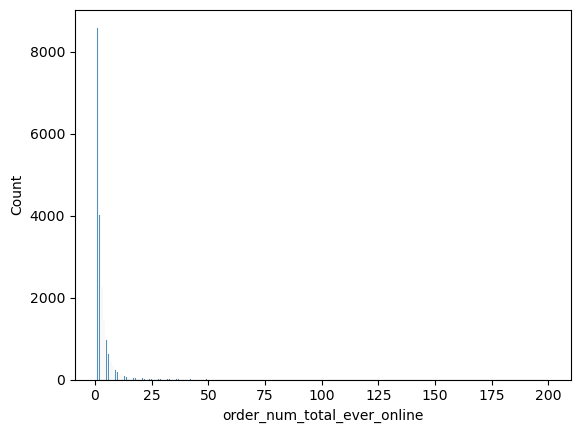

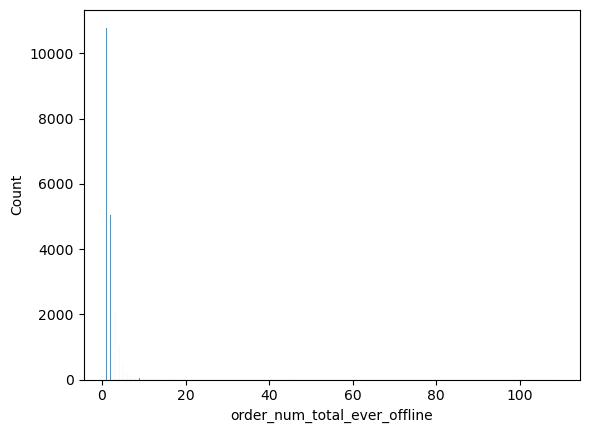

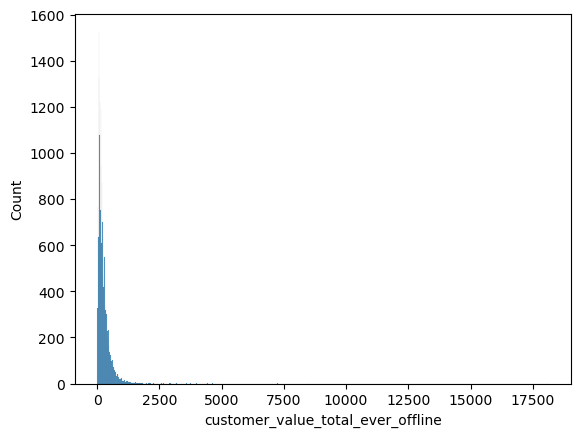

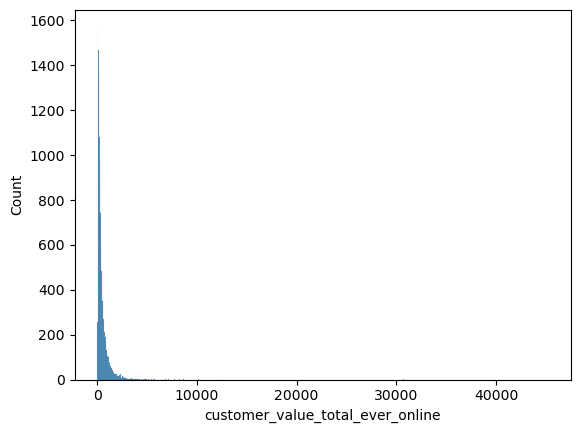

In [5]:
for col in df.columns:
    if str(df[col].dtypes) in ["int64", "float64"]:
        sns.histplot(data=df, x=col)
        plt.show(block=True)


#### Outlier Elimination

In [6]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return round(low_limit), round(up_limit)


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [7]:
for x in df.columns:
    if str(df[x].dtypes) in ["int64", "float64"]:
        print(f" for {x} threshold : {outlier_thresholds(df, x)}")

 for order_num_total_ever_online threshold : (-12, 24)
 for order_num_total_ever_offline threshold : (-4, 8)
 for customer_value_total_ever_offline threshold : (-941, 1676)
 for customer_value_total_ever_online threshold : (-2175, 3796)


In [8]:
for x in df.columns:
    if str(df[x].dtypes) in ["int64", "float64"]:
        replace_with_thresholds(df,x)

In [9]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
order_num_total_ever_online,19945.000,3.046,3.442,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,3.000,4.000,7.000,10.000,20.000,24.000
order_num_total_ever_offline,19945.000,1.865,1.300,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,3.000,4.000,4.000,7.000,8.000
customer_value_total_ever_offline,19945.000,249.740,233.365,10.000,19.990,39.990,59.990,89.980,110.480,140.230,179.980,220.860,281.868,365.058,519.950,694.222,1219.947,1676.000
customer_value_total_ever_online,19945.000,481.269,568.284,12.990,39.990,63.990,84.990,125.990,173.970,219.990,286.460,371.944,491.526,690.868,1082.036,1556.726,3143.810,3796.000


#### Creating new variables 

In [10]:
df["Total_Transaction_Count"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["Total_Price"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

In [11]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Transaction_Count,Total_Price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


#### Changing the types of the variables

In [12]:
date_var= [col for col in df.columns if "date" in col]

for i in df[date_var]:
    df[i] = df[i].apply(pd.to_datetime)


In [13]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
Total_Transaction_Count                     float64
Total_Price                                 float64
dtype: object

#### Understanding the variables

In [14]:
df.groupby("order_channel").agg({"Total_Transaction_Count": ["mean", "sum", "min", "max","count"],
                                 "Total_Price": ["mean", "sum", "min", "max","count"]})

Total_Transaction_Count                               \
                                 mean       sum   min    max count   
order_channel                                                        
Android App                     5.378 51068.000 2.000 32.000  9495   
Desktop                         3.933 10756.000 2.000 29.000  2735   
Ios App                         5.235 14832.000 2.000 32.000  2833   
Mobile                          4.364 21304.000 2.000 27.000  4882   

              Total_Price                                    
                     mean         sum    min      max count  
order_channel                                                
Android App       800.930 7604834.780 55.980 5440.790  9495  
Desktop           575.767 1574722.290 44.980 4809.810  2735  
Ios App           848.512 2403834.270 69.980 5334.320  2833  
Mobile            613.801 2996575.470 44.980 4581.680  4882

In [15]:
#Top 10 customers with the most profits
df[["Total_Price", "master_id"]].sort_values(ascending=False, by='Total_Price').head(10)

,Total_Price,master_id
16335,5440.790,f24f6988-acd9-11e9-a2fc-000d3a38a36f
15548,5334.320,e205f2ee-acdf-11e9-a2fc-000d3a38a36f
7613,5059.760,73fd19aa-9e37-11e9-9897-000d3a38a36f
900,4999.480,a665d39e-a0d2-11e9-a2fc-000d3a38a36f
2947,4863.760,bdf7a804-b1dd-11e9-89fa-000d3a38a36f
15476,4855.910,2f1797c8-a0e6-11e9-a2fc-000d3a38a36f
5746,4839.320,6083756a-66a3-11ea-82da-000d3a38a36f
8868,4809.810,9ce6e520-89b0-11ea-a6e7-000d3a38a36f
18692,4655.930,bbc236ae-9f35-11e9-9897-000d3a38a36f
9363,4646.910,e6c4f4ba-a839-11e9-a2fc-000d3a38a36f


In [16]:
#Top 10 customers with the most orders
df[["Total_Transaction_Count", "master_id"]].sort_values(ascending=False, by='Total_Transaction_Count').head(10)

,Total_Transaction_Count,master_id
900,32.000,a665d39e-a0d2-11e9-a2fc-000d3a38a36f
16335,32.000,f24f6988-acd9-11e9-a2fc-000d3a38a36f
5746,32.000,6083756a-66a3-11ea-82da-000d3a38a36f
6337,31.000,f7e2335e-a7c4-11e9-a2fc-000d3a38a36f
19121,30.000,a37f4760-b12a-11e9-9757-000d3a38a36f
12196,30.000,47dc9298-a6e7-11e9-a2fc-000d3a38a36f
11974,30.000,e4e1ea48-5b23-11ea-8b87-000d3a38a36f
6599,29.000,55e898a4-9e28-11e9-9897-000d3a38a36f
4079,29.000,92579b54-9f96-11e9-a2fc-000d3a38a36f
9363,29.000,e6c4f4ba-a839-11e9-a2fc-000d3a38a36f


#### RFM Metrics

In order to calculate the recency score, we need to refer to any analysis day. For this case, I will add 2 days to the last order day in the data and set it as the analysis day.

In [17]:
df["Date_of_analysis"] = df["last_order_date"].max() + dt.timedelta(days=2)

In [18]:
df["Recency"] = (df["Date_of_analysis"] - df["first_order_date"]).astype('timedelta64[D]')

df["Frequency"] = df["Total_Transaction_Count"]

df["Monetary"] = df["Total_Price"]

In [19]:
rfm = df[["master_id", "Recency", "Frequency", "Monetary"]].copy()
rfm.head()

,master_id,Recency,Frequency,Monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,214.000,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1574.000,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,552.000,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,146.000,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,668.000,2.000,209.980


#### RFM Scores

Since the lowest recency value is the best for us, inverse score assignment was made when calculating with qcut. Assigning this data to segments using qcut is just an example. This can be done by paying attention to the rule-based segment assignments of the companies.

In [20]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

In [21]:
rfm["RF_SCORE"] = rfm["recency_score"].astype((str)) + rfm["frequency_score"].astype((str))

#### Segmentation

In [22]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention', 
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'  
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [23]:
rfm.head()

,master_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,214.000,5.000,939.370,5,4,4,54,champions
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1574.000,21.000,2013.550,1,5,5,15,cant_loose
2,69b69676-1a40-11ea-941b-000d3a38a36f,552.000,5.000,585.320,4,4,3,44,loyal_customers
3,1854e56c-491f-11eb-806e-000d3a38a36f,146.000,2.000,121.970,5,1,1,51,new_customers
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,668.000,2.000,209.980,3,1,1,31,about_to_sleep


#### Analysis

In [24]:
rfm.groupby("segment").mean()

,Recency,Frequency,Monetary
segment,,,
about_to_sleep,652.845,2.464,369.017
at_Risk,1186.193,4.688,659.953
cant_loose,1418.381,11.346,1576.036
champions,346.063,6.656,1122.546
hibernating,1119.085,2.493,359.325
loyal_customers,608.472,6.819,1051.868
need_attention,654.527,3.745,543.450
new_customers,293.211,2.000,339.694
potential_loyalists,435.458,3.185,521.672


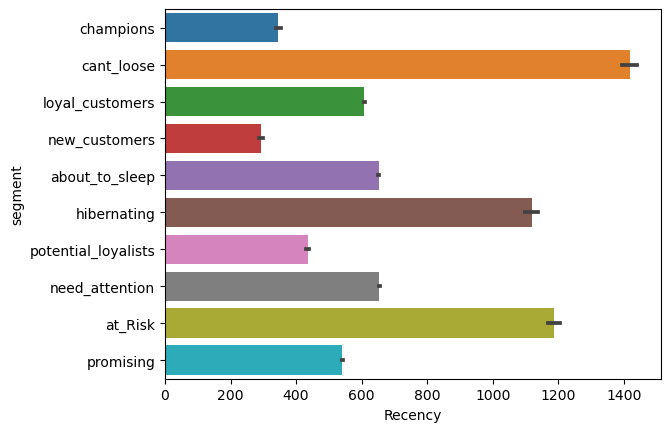

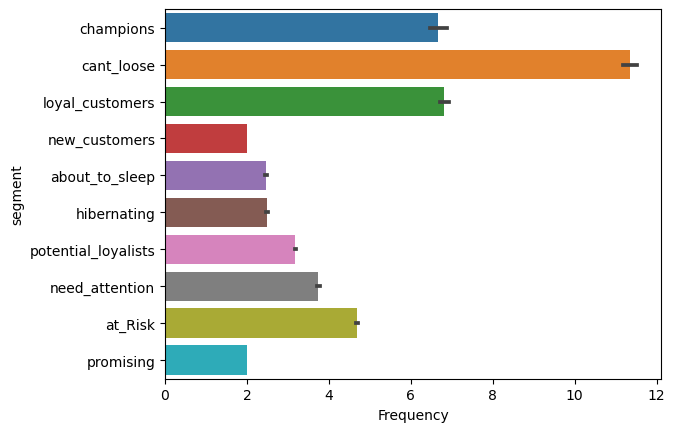

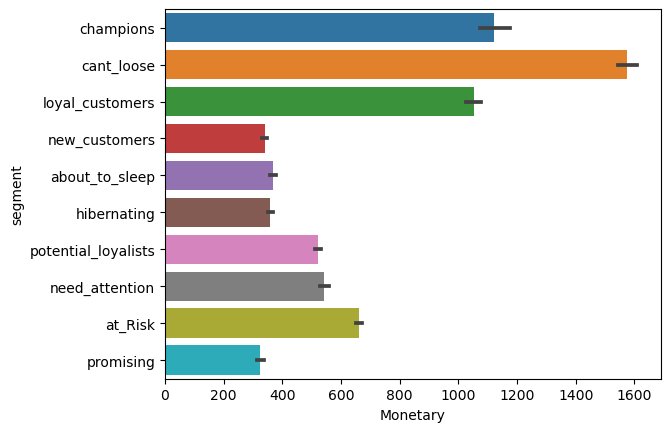

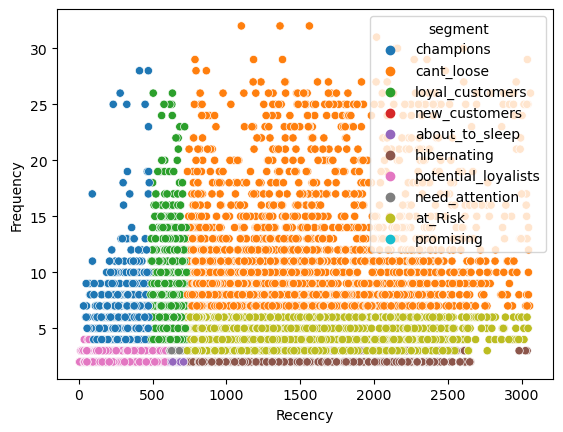

In [25]:
def visualization(df, col, target):
    sns.barplot(x=df[col], y=df[target], estimator=np.mean);
    plt.show(block=True)
    
list = ["Recency", "Frequency", "Monetary"]
for i in list:
    visualization(rfm, i, "segment")

sns.scatterplot(x="Recency", y="Frequency", hue="segment", data=rfm)
plt.show(block=True)    

In [26]:
import plotly.graph_objects as go


rfm_coordinates = {"champions": [3, 5, 0.8, 1],
                   "loyal_customers": [3, 5, 0.4, 0.8],
                   "cant_loose": [4, 5, 0, 0.4],
                   "at_risk": [2, 4, 0, 0.4],
                   "hibernating": [0, 2, 0, 0.4],
                   "about_to_sleep": [0, 2, 0.4, 0.6],
                   "promising": [0, 1, 0.6, 0.8],
                   "new_customers": [0, 1, 0.8, 1],
                   "potential_loyalists": [1, 3, 0.6, 1],
                   "need_attention": [2, 3, 0.4, 0.6]}

palette = ["#282828", "#04621B", "#971194", "#F1480F", "#4C00FF",
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

fig = go.Figure()

df_shp = pd.DataFrame(rfm_coordinates).T.rename(
    columns={0: "y0", 1: "y1", 2: "x0", 3: "x1"}
)
df_shp["fillcolor"] = palette
df_shp.loc[:, ["x0", "x1"]] = df_shp.loc[:, ["x0", "x1"]] * 5

for segment, r in df_shp.iterrows():
    fig.add_shape(**r.to_dict(), opacity=0.6)
fig.update_layout(
    xaxis=dict(range=[0, 5], dtick=1, showgrid=False),
    yaxis=dict(range=[0, 5], showgrid=False),
    margin={"l": 0, "r": 0, "b": 0, "t": 0},
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
)

df_txt = (
    rfm.reset_index().groupby("segment")
    .agg(avg_monetary=("Monetary", "mean"), number=("Monetary", "size"))
    .join(df_shp, how="right")
    .fillna(0)
)
fig.add_trace(
    go.Scatter(
        x=df_txt.loc[:, ["x0", "x1"]].mean(axis=1),
        y=df_txt.loc[:, ["y0", "y1"]].mean(axis=1),
        text=df_txt.index,
        customdata=df_txt.loc[:, ["avg_monetary", "number"]].astype(int).values,
        mode="text",
        texttemplate="<b>%{text}</b><br>Total Users:%{customdata[1]}<br>Average Monetary:%{customdata[0]}",
    )
)
fig.show()

#### Questions:

1.FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, customers in the profile who will be interested in the promotion of the brand and product sales are requested to be contacted privately. These customers were planned to be loyal and female shoppers. Who are these customers?

In [27]:
df_new = pd.merge(df, rfm[["master_id", "segment"]], how="left")

df_a = df_new[(df_new["interested_in_categories_12"].str.contains("KADIN")) & 
              (df_new["segment"].str.contains("loyal_customers|potential_loyalists"))]
df_a.head()
        


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Transaction_Count,Total_Price,Date_of_analysis,Recency,Frequency,Monetary,segment
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320,2021-06-01,552.000,5.000,585.320,loyal_customers
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]",5.000,1054.690,2021-06-01,495.000,5.000,1054.690,loyal_customers
15,13ed97a4-b167-11e9-89fa-000d3a38a36f,Mobile,Desktop,2019-06-13,2020-08-17,2020-08-17,2020-07-28,7.000,1.000,112.970,819.390,"[AKTIFCOCUK, COCUK, KADIN]",8.000,932.360,2021-06-01,719.000,8.000,932.360,loyal_customers
25,6ff327d4-b0e1-11e9-9757-000d3a38a36f,Android App,Offline,2020-02-04,2021-01-19,2020-10-23,2021-01-19,1.000,2.000,243.460,103.990,[KADIN],3.000,347.450,2021-06-01,483.000,3.000,347.450,potential_loyalists
33,fb840306-1219-11ea-a001-000d3a38a36f,Ios App,Ios App,2020-01-18,2021-02-05,2021-02-05,2020-01-18,7.000,1.000,89.990,833.650,"[ERKEK, KADIN, AKTIFSPOR]",8.000,923.640,2021-06-01,500.000,8.000,923.640,loyal_customers


2. Up to 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. Who are these customers?

In [28]:
df_b = df_new[(df_new["interested_in_categories_12"].str.contains("ERKEK | COCUK"))  #male and chil
              & (df_new["segment"].str.contains("cant_loose|about_to_sleep|new_customers"))]

df_b.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Transaction_Count,Total_Price,Date_of_analysis,Recency,Frequency,Monetary,segment
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550,2021-06-01,1574.000,21.000,2013.550,cant_loose
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970,2021-06-01,146.000,2.000,121.970,new_customers
10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1.000,1.000,74.990,39.990,"[AKTIFCOCUK, COCUK, KADIN]",2.000,114.980,2021-06-01,317.000,2.000,114.980,new_customers
18,1ee5ae66-7237-11eb-aa44-000d3a38a36f,Android App,Android App,2021-02-17,2021-04-11,2021-04-11,2021-02-17,1.000,1.000,59.990,207.130,"[AKTIFCOCUK, COCUK, AKTIFSPOR]",2.000,267.120,2021-06-01,104.000,2.000,267.120,new_customers
63,6ece7c1c-4594-11ea-acaf-000d3a38a36f,Desktop,Desktop,2019-08-02,2021-04-20,2021-04-20,2019-08-02,2.000,1.000,89.990,190.770,"[ERKEK, COCUK]",3.000,280.760,2021-06-01,669.000,3.000,280.760,about_to_sleep
